In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_bodyfat.csv")

In [3]:
# Use DFE to find the best 3 predictors
df1 = df.drop(columns=['DENSITY'])
target = 'BODYFAT'
features = df1.columns.drop([target, 'IDNO'])

X = df1[features]
y = df1[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a model
model = RandomForestRegressor()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=3)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = pd.Series(rfe.support_, index = X.columns)

In [4]:
selected_features

AGE          False
WEIGHT       False
HEIGHT        True
ADIPOSITY    False
NECK         False
CHEST        False
ABDOMEN       True
HIP          False
THIGH         True
KNEE         False
ANKLE        False
BICEPS       False
FOREARM      False
WRIST        False
dtype: bool

In [6]:
# case of 2 predictors
rfe = RFE(estimator=model, n_features_to_select=2)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features2 = pd.Series(rfe.support_, index = X.columns)

In [7]:
selected_features2

AGE          False
WEIGHT       False
HEIGHT        True
ADIPOSITY    False
NECK         False
CHEST        False
ABDOMEN       True
HIP          False
THIGH        False
KNEE         False
ANKLE        False
BICEPS       False
FOREARM      False
WRIST        False
dtype: bool

In [8]:
# use 'ABDOMEN' 'height' 'knee' as predictors
# fit random forest regression model
features3 = ['HEIGHT', 'ABDOMEN', 'KNEE']

X6 = df[features3]
y = df[target]

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train6, y_train6)

RandomForestRegressor(random_state=42)

In [9]:
y_pred6 = model.predict(X_test6)

# Evaluate
mse6 = mean_squared_error(y_test6, y_pred6)
rmse6 = mse6 ** 0.5
r2 = r2_score(y_test6, y_pred6)

print(f'Mean Squared Error: {mse6:.2f}')
print(f'Root Mean Squared Error: {rmse6:.2f}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 27.00
Root Mean Squared Error: 5.20
R^2 Score: 0.5441227348593685


In [10]:
# use 'ABDOMEN' 'height' 'weight' as predictors
features2 = ['WEIGHT', 'HEIGHT', 'ABDOMEN']

X5 = df[features2]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train5, y_train5)

RandomForestRegressor(random_state=42)

In [11]:
y_pred5 = model.predict(X_test5)

# Evaluate
mae5 = mean_absolute_error(y_test5, y_pred5)
mse5 = mean_squared_error(y_test5, y_pred5)
rmse5 = mse5 ** 0.5
r2 = r2_score(y_test5, y_pred5)

print(f'Mean Absolute Error: {mae5:.2f}')
print(f'Mean Squared Error: {mse5:.2f}')
print(f'Root Mean Squared Error: {rmse5:.2f}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 3.78
Mean Squared Error: 23.08
Root Mean Squared Error: 4.80
R^2 Score: 0.6103235373390519


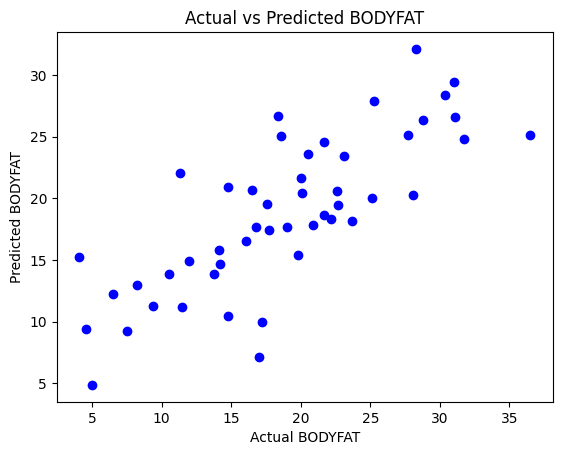

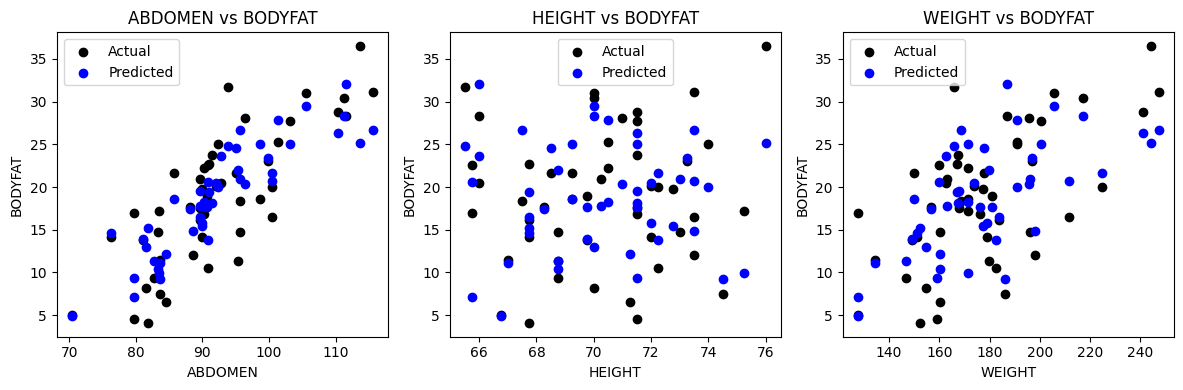

In [12]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test5, y_pred5, color='blue')
plt.xlabel('Actual BODYFAT')
plt.ylabel('Predicted BODYFAT')
plt.title('Actual vs Predicted BODYFAT')
plt.show()

# Scatter plot for each predictor vs. target
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(X_test5['ABDOMEN'], y_test5, color='black', label='Actual')
ax[0].scatter(X_test5['ABDOMEN'], y_pred5, color='blue', label='Predicted')
ax[0].set_xlabel('ABDOMEN')
ax[0].set_ylabel('BODYFAT')
ax[0].legend()
ax[0].set_title('ABDOMEN vs BODYFAT')

ax[1].scatter(X_test5['HEIGHT'], y_test5, color='black', label='Actual')
ax[1].scatter(X_test5['HEIGHT'], y_pred5, color='blue', label='Predicted')
ax[1].set_xlabel('HEIGHT')
ax[1].set_ylabel('BODYFAT')
ax[1].legend()
ax[1].set_title('HEIGHT vs BODYFAT')

ax[2].scatter(X_test5['WEIGHT'], y_test5, color='black', label='Actual')
ax[2].scatter(X_test5['WEIGHT'], y_pred5, color='blue', label='Predicted')
ax[2].set_xlabel('WEIGHT')
ax[2].set_ylabel('BODYFAT')
ax[2].legend()
ax[2].set_title('WEIGHT vs BODYFAT')

plt.tight_layout()
plt.show()

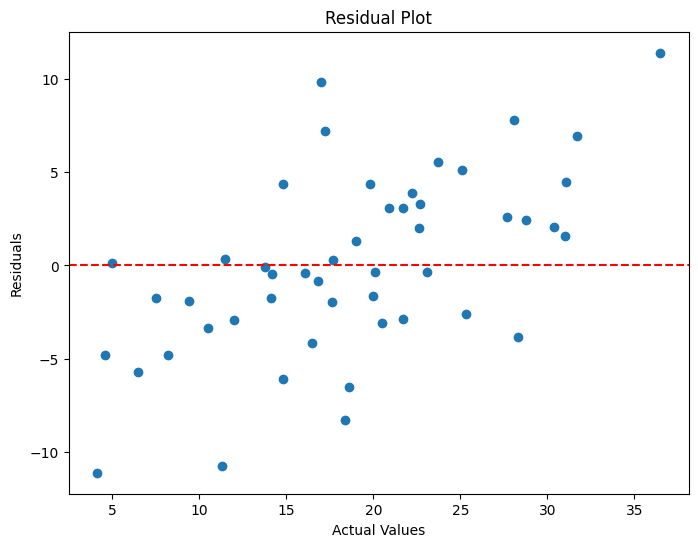

In [13]:
residuals = y_test5 - y_pred5
plt.figure(figsize=(8, 6))
plt.scatter(y_test5, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [14]:
# use 'ABDOMEN' 'height' 'thigh' as predictors
features1 = ['HEIGHT', 'ABDOMEN', 'THIGH']

X4 = df[features1]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train4, y_train4)

RandomForestRegressor(random_state=42)

In [15]:
y_pred4 = model.predict(X_test4)

mse4 = mean_squared_error(y_test4, y_pred4)
rmse4 = mse4 ** 0.5
r2 = r2_score(y_test4, y_pred4)

print(f'Mean Squared Error: {mse4:.2f}')
print(f'Root Mean Squared Error: {rmse4:.2f}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 27.54
Root Mean Squared Error: 5.25
R^2 Score: 0.5350062272443128


In [220]:
# try abdomen
target = 'BODYFAT'
feature1 = ['ABDOMEN']

In [221]:
X = df[feature1]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [223]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 30.36
Root Mean Squared Error: 5.51
R^2 Score: 0.48741435164714175


In [224]:
# use 'ABDOMEN' and 'thigh'
features3 = ['ABDOMEN', 'THIGH']

X3 = df[features3]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train3, y_train3)

RandomForestRegressor(random_state=42)

In [225]:
y_pred3 = model.predict(X_test3)

mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = mse3 ** 0.5
r2 = r2_score(y_test3, y_pred3)

print(f'Mean Squared Error: {mse3:.2f}')
print(f'Root Mean Squared Error: {rmse3:.2f}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 28.99
Root Mean Squared Error: 5.38
R^2 Score: 0.5105358132980624


In [233]:
# use 'ABDOMEN' and 'height' as predictors
features4 = ['ABDOMEN', 'HEIGHT']

X7 = df[features4]

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train7, y_train7)

RandomForestRegressor(random_state=42)

In [236]:
y_pred7 = model.predict(X_test7)

mae7 = mean_absolute_error(y_test7, y_pred7)
mse7 = mean_squared_error(y_test7, y_pred7)
rmse7 = mse7 ** 0.5
r2 = r2_score(y_test7, y_pred7)

print(f'Mean Absolute Error: {mae7:.2f}')
print(f'Mean Squared Error: {mse7:.2f}')
print(f'Root Mean Squared Error: {rmse7:.2f}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 4.03
Mean Squared Error: 25.06
Root Mean Squared Error: 5.01
R^2 Score: 0.5769107050616502


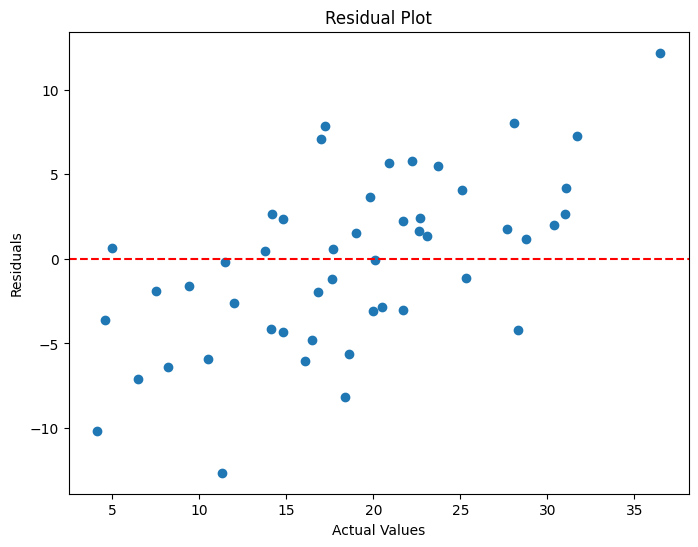

In [235]:
residuals = y_test7 - y_pred7
plt.figure(figsize=(8, 6))
plt.scatter(y_test7, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

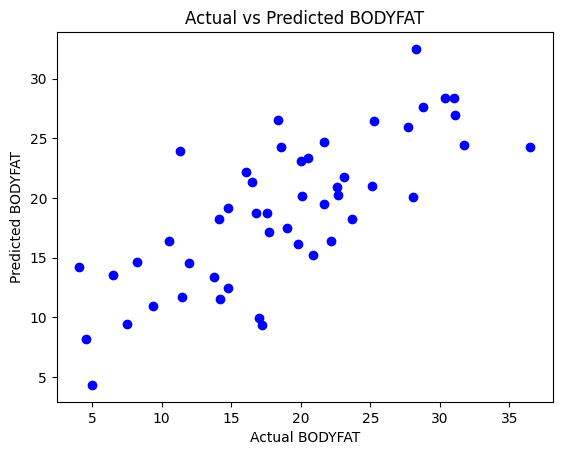

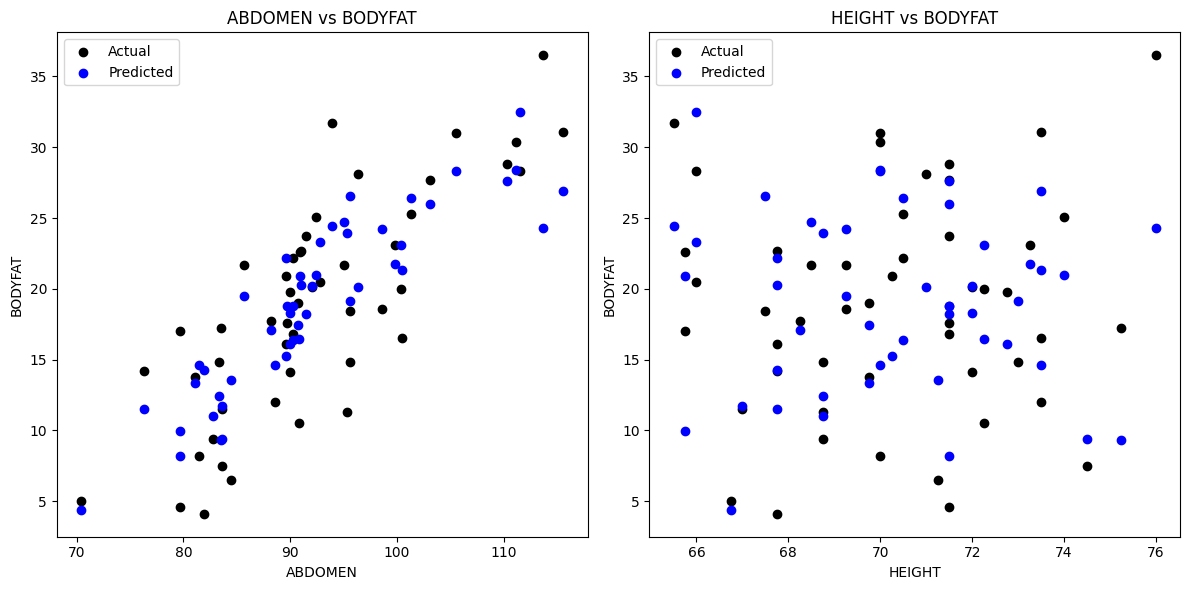

In [228]:
plt.scatter(y_test7, y_pred7, color='blue')
plt.xlabel('Actual BODYFAT')
plt.ylabel('Predicted BODYFAT')
plt.title('Actual vs Predicted BODYFAT')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_test7['ABDOMEN'], y_test7, color='black', label='Actual')
ax[0].scatter(X_test7['ABDOMEN'], y_pred7, color='blue', label='Predicted')
ax[0].set_xlabel('ABDOMEN')
ax[0].set_ylabel('BODYFAT')
ax[0].legend()
ax[0].set_title('ABDOMEN vs BODYFAT')

ax[1].scatter(X_test7['HEIGHT'], y_test7, color='black', label='Actual')
ax[1].scatter(X_test7['HEIGHT'], y_pred7, color='blue', label='Predicted')
ax[1].set_xlabel('HEIGHT')
ax[1].set_ylabel('BODYFAT')
ax[1].legend()
ax[1].set_title('HEIGHT vs BODYFAT')

plt.tight_layout()
plt.show()